In [2]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv('data/Survey.csv')

In [4]:
df.columns

Index(['Timestamp',
       'Pleaseconfirmyourvoluntaryparticipationandgiveyourconsentfordata',
       'Profession', 'Country', 'Region', 'Place of residence province',
       '@4.HighestLevelofeducation', '@5.Whichsettingdoyouwork', 'sex', 'Age',
       '@8.Maritalstatus',
       '@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional',
       'COVIDNewsUpdates', 'A1.1HaveyouheardaboutCOVID19',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]',
       'WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]',
       'A3.8 Do you or your household members use internet?',
       'A3.9 Please indicate which of the following do you use for COVID-19

In [189]:
#Fixing Sex Column
df.sex.replace({'Transgender 1': 'Transgender','0nbinary':'Binary','1':'Female','2':'Male'},inplace=True)
#Drop 2 Outliers
df = df[df['sex'].isin(['Female','Male'])]
df.sex.value_counts()

Male      1728
Female    1303
Name: sex, dtype: int64

In [152]:
#Fixing Profession
df.Profession.replace({'others':'Others'},inplace=True)
df.Profession.value_counts()

Academian/Administration    1631
Medical Professionals       1349
Others                        56
Name: Profession, dtype: int64

In [153]:
#Fixing Country
df.Country.replace({'Maxico':'Mexico'},inplace=True)
df.Country.value_counts()

China                   712
Mexico                  595
Bangladesh              494
United States           335
Pakistan                285
Malaysia                151
Japan                    87
Zambia                   76
Turkey                   38
Ghana                    36
United kingdom           30
Bosnia & Herzegowina     24
Nepal                    15
Colombia                 12
England                  11
India                    11
Thailand                 11
United Arab Emirates     11
Brazil                   10
Saudi Arabia              9
Norway                    7
Italy                     5
Oman                      4
Morocco                   4
Germany                   4
Australia                 3
Chile                     3
South Africa              3
New Zealand               3
Canada                    3
Hungary                   3
Kazakhstan                2
Myanmar                   2
Kenya                     2
Venezuela                 2
Ireland             

In [14]:
df['Place of residence province'].value_counts()[:20]

Dhaka                 134
So0ra, Hermosillo     114
Rangpur                54
Puebla                 45
Hermosillo, So0ra      38
Rajshahi               33
So0ra                  33
SO0RA, HERMOSILLO      31
Karachi                29
Islamabad              27
Shizuoka é™å²¡çœŒ     26
Kuala Lumpur           26
Puebla, Puebla         24
AydÄ±n                 20
Lusaka                 19
Tokyo æ±äº¬éƒ½        16
Nagasaki é•·å´ŽçœŒ     15
Portland, OR           14
Sylhet                 13
Selangor               12
Name: Place of residence province, dtype: int64

In [154]:
#Fixing Education
df['@4.HighestLevelofeducation'].replace({'Bachelor/undergraduate':'Undergrad','Bachelor\'s degree': 'Undergrad',
                                          'Master/graduate or Ph.D.':'Postgrad','Junior high school or lower':'Primary School',
                                         'High school':'High School','PhD':'Postgrad','Masters':'Postgrad','college':'College',
                                         'master\'s degree':'Postgrad','Bachelor':'Undergrad','Master':'Postgrad',
                                         'Graduate School(Master) å¤§å­¦é™¢å’æ¥­ï¼ˆä¿®å£«ï¼‰':'Postgrad',
                                         'Doctorate':'Postgrad','bachelor':'Undergrad','Bachelor å¤§å­¦å’æ¥­':'Undergrad',
                                          'high school':'High School','HSC':'High School','University':'Undergrad',
                                         'Some college':'College','Master\'s degree':'Postgrad','Tertiary':'Undergrad',
                                         'Bachelors':'Undergrad','High School é«˜ç­‰å­¦æ ¡å’æ¥­':'High School',
                                         'Graduation':'Undergrad','Graduate': 'Undergrad','Undergraduate':'Undergrad',
                                         'High School é«˜ç‰å¦æ ¡å’æ¥':'High School','High school diploma':'High School',
                                         'Bachelor\'s':'Undergrad','Masters Degree':'Postgrad','Bachelor degree':'Undergrad',
                                         'Bsc':'Undergrad','Masters degree':'Postgrad','Ho0urs':'Undergrad',
                                         'Bachelors Degree':'Undergrad','MSc':'Postgrad','Mbbs':'MBBS','Graduate School(Doctor) å¤§å­¦é™¢å’æ¥­ï¼ˆåšå£«ï¼‰':'MBBS',
                                         'MBBS 2nd year':'MBBS','M.B.B.S':'MBBS','Hsc':'High School','MSN':'MBBS','MBBS 1t year':'MBBS'},inplace=True)
#Yet to Finish--------------------------------------------------------------------








df['@4.HighestLevelofeducation'].value_counts()[:10].values

array([675, 418, 283, 201, 193, 114,  56,  16,  15,  11])

In [155]:
df['@5.Whichsettingdoyouwork'].value_counts()

Medical                      495
Community                    377
OPD                          117
Surgcial                      80
External consultation         42
                            ... 
Furloughed                     1
Studying in a college          1
English medium                 1
IPD                            1
Climate change, heat wave      1
Name: @5.Whichsettingdoyouwork, Length: 552, dtype: int64

In [190]:
#Drop Age = 2,1885,1984
df = df[~df['Age'].isin([2,1885,1984])]
#Binning by Age
df['AgeBin'] = pd.qcut(df['Age'],5)
df['AgeBin'].value_counts()

(8.999, 21.0]    698
(30.0, 41.0]     614
(41.0, 76.0]     597
(24.0, 30.0]     594
(21.0, 24.0]     528
Name: AgeBin, dtype: int64

In [157]:
#Fixing Maritial Status
df['@8.Maritalstatus'].replace({'In a realtionship':'1'},inplace=True)
df['@8.Maritalstatus'].value_counts()

1    1709
2    1196
3     126
Name: @8.Maritalstatus, dtype: int64

In [158]:
df['@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional'].unique()

array(['2.8888', '400', nan, '0', '6000', '25000', '10', '1500', '12000',
       '200', '120000', '5000', '100000', '10000', '500', '60000',
       '80000', '220000', '50000', '2900', '4000', '7600', 'My parents',
       '20000', '440', '600', '800', '300000', '70000', '52000', '30000',
       '90000', '200000', '50', '350', '300', '2000', '15000',
       '40,000 mexica0s pesos', '9000', '35000', '1000', '27000',
       '876543', '420', '$ 20 000', '100', '13000000', '8000', '5416',
       '1143', '2500', '7500', '3000', '4000 mexican pesos', '10,000 MXN',
       '400000', '1800', '40000', '2200', '500000', '16000', '2060',
       '45000', '3800', '18000', '380', '4250', '7000', 'parent ssupport',
       '$8500 MNX', 'students', '16', '3500', '4300', '8500', '6250',
       '250000', '600000', '36000', '9200', '13000', '38000', '75000',
       '5000000', '44000', '11000', '1200', '35570', '5000 monthly',
       '4500', '60', '699', '52.5', '1000000', '700',
       'I depend on my parent

In [159]:
df['A1.1HaveyouheardaboutCOVID19'].value_counts()

1    2745
0     286
Name: A1.1HaveyouheardaboutCOVID19, dtype: int64

In [191]:
df['Access_Of_Information'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]']\
+ df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]']\
+ df['WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia']\
+ df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]']\
+ df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]']

In [5]:
df['Access_Of_Information'].value_counts()

5.0    1062
4.0     698
3.0     667
2.0     379
1.0     156
0.0       1
Name: Access_Of_Information, dtype: int64

In [9]:
cleaned = pd.DataFrame()
cleaned['Profession'] = df['Profession']
cleaned['Country'] = df['Country']
cleaned['Region'] = df['Region']
cleaned['Education'] = df['@4.HighestLevelofeducation']
cleaned['Sex'] = df['sex']
cleaned['Age'] = df['Age']
cleaned['AgeBin'] = df['AgeBin']
cleaned['1.1HeardCovid'] = df['A1.1HaveyouheardaboutCOVID19']
cleaned['1.2_Television/Radio'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]']
cleaned['1.2_Newspaper/Magazines'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]']
cleaned['1.2_SocialMedia'] = df['WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia']
cleaned['1.2_Colleagues/Workplace'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]']
cleaned['1.2_Neighbors'] = df['A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]']
cleaned['Access_Of_Information'] = cleaned['1.2_Television/Radio'] \
                                + cleaned['1.2_Newspaper/Magazines'] + cleaned['1.2_SocialMedia'] +\
                                cleaned['1.2_Colleagues/Workplace'] + cleaned['1.2_Neighbors'] 


In [16]:
#New from 11 Jan 2021
cleaned['3.8_Internet'] = df['A3.8 Do you or your household members use internet?']

cleaned['3.9_Newspaper'] = df['A3.9 Please indicate which of the following do you use for COVID-19 update (check all that apply)? [Newspaper]']
cleaned['3.9_TV'] = df['A3.9 Please indicate which of the following do you use for COVID-19 update (check all that apply)? [TV (local/ international)]']
cleaned['3.9_SocialMedia'] = df['A3.9 Please indicate which of the following do you use for COVID-19 update (check all that apply)? [Social media (Facebook, Instagram, Line, YouTube etc.)]']
cleaned['3.9_Internet'] = df['A3.9 Please indicate which of the following do you use for COVID-19 update (check all that apply)? [Internet (WHO websites)]']

cleaned['3.10_TimeSpentOnCovidNews'] = df['A3.10 How much time, on average, per day do you spend on the topics related to COVID-19 (e.g. via news coverage, work, conversations, thoughts)? Please indicate a daily average..']

cleaned['1.3_CovidKnowledgeLevel'] = df['B1.3 How would you rate the extend of your k0wledge of COVID-19?']

cleaned['1.4_ContactRespiratoryDrop'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [Contact with respiratory droplets]']
cleaned['1.4_Touching'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [Touching and shaking hands with an infected person]']
cleaned['1.4_UseSameObject'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [The use of objects used by an infected person]']
cleaned['1.4_Sex'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [Sexual route]']
cleaned['1.4_PersonToPerson'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [Person-to-person]']
cleaned['1.4_CloseContact'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [Close contact]']
cleaned['1.4_TouchingCoin'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [Touching currency/Coin]']
cleaned['1.4_CovidFloatOnAir'] = df['B1.4 How does COVID19 Spread/Transmitted (check all that apply) [COVID-19 can float on air almost 30 minutes]']

cleaned['1.5_Fever'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [Fever]']
cleaned['1.5_Tiredness'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [Tiredness]']
cleaned['1.5_Cough'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [Dry cough]']
cleaned['1.5_ShortnessBreath'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [Shortness of breath/Breathing difficulties]']
cleaned['1.5_AchesPain'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [aches and pains]']
cleaned['1.5_NasalCongestion'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [nasal congestion]']
cleaned['1.5_RunningNose'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [runny 0se]']
cleaned['1.5_SoreThroat'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [sore throat]']
cleaned['1.5_Diarrhea'] = df['B1.5 In your opinion, what are the signs and symptoms of COVID-19 (check all that apply) [Diarrhea]']
                             
                             

In [92]:
#Clean
cleaned['1.5_Diarrhea'].replace({'If 0':'0'},inplace=True)
cleaned['1.5_SoreThroat'].replace({'If 0':'0'},inplace=True)
cleaned['1.5_RunningNose'].replace({'If 0':'0'},inplace=True)
cleaned['1.5_NasalCongestion'].replace({'If 0':'0'},inplace=True)
cleaned['1.5_AchesPain'].replace({'If 0':'0'},inplace=True)
cleaned['1.5_Cough'].replace({'If 0':'0'},inplace=True)
cleaned['1.5_Tiredness'].replace({'If 0':'0'},inplace=True)
cleaned['1.3_CovidKnowledgeLevel'].replace({'Very limited':'1','Good understanding':'5','一般':'3',
                                            'Familiar':'3','Unfamiliar':'1','了解':'5','非常不了解':'1',
                                           '不了解':'1','非常了解':'5'},inplace=True)
cleaned['3.9_Internet'].replace({'IF 0T':'0'},inplace=True)
cleaned['3.9_TV'].replace({'IF 0T':'0'},inplace=True)
cleaned['3.9_Newspaper'].replace({'IF 0T':'0'},inplace=True)
cleaned['3.8_Internet'].replace({'0t':'0'},inplace=True)

In [96]:
cleaned.to_csv('data/Cleaned.csv',index=False)

In [70]:
df['COVIDK0wledgeampAwarenesPublicOpinion'].value_counts()

Series([], Name: COVIDK0wledgeampAwarenesPublicOpinion, dtype: int64)

In [97]:
df.columns

Index(['Timestamp',
       'Pleaseconfirmyourvoluntaryparticipationandgiveyourconsentfordata',
       'Profession', 'Country', 'Region', 'Place of residence province',
       '@4.HighestLevelofeducation', '@5.Whichsettingdoyouwork', 'sex', 'Age',
       '@8.Maritalstatus',
       '@9.MonthlytotalIncomefamilyincomeinlocalcurrencyoptional',
       'COVIDNewsUpdates', 'A1.1HaveyouheardaboutCOVID19',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Television/Radio]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Newspaper/ Magazines]',
       'WheredidyouhearaboutCOVID19mostcheckallthatapplySocialmedia',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Colleagues/workplace]',
       'A1.2 Where did you hear about COVID-19 most? (check all that apply ) [Neighbors]',
       'A3.8 Do you or your household members use internet?',
       'A3.9 Please indicate which of the following do you use for COVID-19

In [99]:
cleaned=['N90BestToControlSpread'] = df['N90 mask(s) do you think is best to control the spread of the COVID-19? (If yes then 1 else 0)']


1    1688
0    1343
Name: N90 mask(s) do you think is best to control the spread of the COVID-19? (If yes then 1 else 0), dtype: int64

In [113]:
cleaned['1.10_Over60Yr'] = df['C1.10 Is anyone in your immediate environment at risk of infection with COVID-19 (e.g. parents, siblings, close friends/colleagues) due to the following? (please select all relevant responses) [age (over 60 years)]']
cleaned['1.10_Over60Yr'].replace({'0 estoy seguro':'1'},inplace=True)
cleaned['1.10_PrexistingCond'] = df['C1.10 Is anyone in your immediate environment at risk of infection with COVID-19 (e.g. parents, siblings, close friends/colleagues) due to the following? (please select all relevant responses) [severe pre-existing conditions (e.g. Respiratory diseases, heart diseases, cancer, immune deficiency problem)]']
cleaned['1.10_PrexistingCond'].replace({'If 0':'0'},inplace=True)
cleaned['1.10_WorkEnvo'] = df['C1.10 Is anyone in your immediate environment at risk of infection with COVID-19 (e.g. parents, siblings, close friends/colleagues) due to the following? (please select all relevant responses) [work environment (e.g. Working in the health care environment and involving in contact with patients)]']
cleaned['1.10_WorkEnvo'].replace({'If 0':'0','0, 3':'3'},inplace=True)
cleaned['1.10_WorkEnvo'].value_counts()
cleaned['1.10_RiskZone'] = df['C1.10 Is anyone in your immediate environment at risk of infection with COVID-19 (e.g. parents, siblings, close friends/colleagues) due to the following? (please select all relevant responses) [exposure to a risk zone/areas/countries (e.g. China, Italy etc.)]']
cleaned['1.10_RiskZone'].replace({'If 0':'0','0,3':'3','0, 3':'3','0 3':'3','0,  3':'3','I\'m 0 sure':'1','1. 0':'0'},inplace=True)
cleaned['1.10_RiskZone'].value_counts()

0    1732
1    1032
3     180
Name: 1.10_RiskZone, dtype: int64

In [127]:
cleaned['KnowledgeScore'] = df['Knowledge scoring {22/22}'].value_counts()  # Some value greater than 22
cleaned['']

In [129]:

cleaned['1.6_Mask'] = df['B1.6 Which mask(s) do you think is best to control the spread of the COVID-19?']

df['B1.7 How long is the incubation period for COVID-19?'].value_counts()
# ['B1.8 Are there any vaccines, drugs or treatments for COVID-19?']
# ['B2.1 Do you think the government should lock-down/restrict travel areas to avoid spread of COVID-19?']
#        ['B2.2 Do you think home quarantine can reduce COVID-19 outbreaks?',
#     ['B2.3 Isolation and treatment of infected people are effective ways to reduce the spread of the virus?']
#     ['B2.4 Do you think personal hygiene is important in controlling the spread of COVID-19?']
#     ['B2.5 Media should take a leading role in raising awareness coronavirus risk reduction and prevention issues ?']

2-14 days                                                                                                                                                                  2083
2-14days                                                                                                                                                                    518
Don't k0w/3                                                                                                                                                                 128
1-7 days                                                                                                                                                                    120
1-7days                                                                                                                                                                      85
999                                                                                                                     

In [124]:
from scipy import stats
df_test = cleaned[cleaned['Country'] == 'United States']
df_test['sex'] = cleaned['Sex']
df_test['Quarantine'] = df['Knowledge scoring {22/22}']
contingency_table = pd.crosstab(df_test['sex'],df_test['Quarantine'])
stat,p,dof,expected = stats.chi2_contingency(contingency_table)
prob = 0.95
#     print(country,dof,df_test['Quarantine'].value_counts())
critical = stats.chi2.ppf(prob,dof)
stat,critical

(33.71575614088924, 24.995790139728616)

<AxesSubplot:xlabel='Quarantine'>

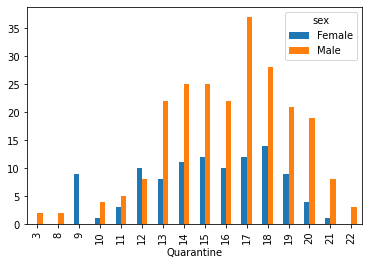

In [125]:
contingency_table.T.plot.bar(stacked=False)

In [126]:
contingency_table

Quarantine,3,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
sex,,,,,,,,,,,,,,,,
Female,0,0,9,1,3,10,8,11,12,10,12,14,9,4,1,0
Male,2,2,0,4,5,8,22,25,25,22,37,28,21,19,8,3
